In [ ]:
import os

api_key = os.environ.get("OPENAI_API_KEY")

if api_key is None:
    raise Exception("Please set your OPENAI_API_KEY environment variable.")

print("API Key:", api_key)


In [3]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
import pandas as pd


# What would this look like without an LLM

In [5]:
df = pd.read_csv('train.csv')


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)


In [11]:
agent.run('What columns are available in the dataset?')



> Entering new AgentExecutor chain...
Thought: I need to find out what columns are in the dataframe.
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Thought: I now know the final answer
Final Answer: The columns available in the dataset are PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.

> Finished chain.


'The columns available in the dataset are PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.'

In [12]:
agent.run('Is there any strong correlation between columns in the dataset?')




> Entering new AgentExecutor chain...
Thought: I should look for a correlation between columns
Action: python_repl_ast
Action Input: df.corr()
Observation:              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-fcLGoNGfsHO2V5Ot1FT5z2w8 on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-fcLGoNGfsHO2V5Ot1FT5z2w8 on requests per min. Limit: 3 / min. Please tr

 I can see that there is a strong correlation between some of the columns, such as Pclass and Fare.
Final Answer: Yes, there is a strong correlation between some of the columns in the dataset.

> Finished chain.


'Yes, there is a strong correlation between some of the columns in the dataset.'

In [13]:
agent.run('Can you provide a summary of the data?')



> Entering new AgentExecutor chain...
Thought: I need to get a summary of the data
Action: python_repl_ast
Action Input: df.describe()
Observation:        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.4542

'The data contains 891 rows and 12 columns. The summary of the data includes the count, mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile, and maximum for each column.'

In [14]:
agent.run('What is the total number of records in the dataset?')




> Entering new AgentExecutor chain...
Thought: I need to count the number of rows in the dataframe
Action: python_repl_ast
Action Input: len(df)
Observation: 891
Thought: I now know the final answer
Final Answer: 891

> Finished chain.


'891'

In [16]:
agent.run("Give only the minimum and maximum values for each column?")




> Entering new AgentExecutor chain...
Thought: I need to find the min and max values for each column
Action: python_repl_ast
Action Input: df.describe()
Observation:        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      

'The minimum and maximum values for each column are as seen in the output of the python_repl_ast command.'



> Entering new AgentExecutor chain...
Thought: I need to figure out which column I want to use and how to create a bar chart.
Action: python_repl_ast
Action Input: df['column_name'].value_counts().plot(kind='bar')
Observation: KeyError: 'column_name'
Thought: I need to specify the column name.
Action: python_repl_ast
Action Input: df['Sex'].value_counts().plot(kind='bar')
Observation: AxesSubplot(0.125,0.11;0.775x0.77)
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-fcLGoNGfsHO2V5Ot1FT5z2w8 on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


 I now know the final answer.
Final Answer: A bar chart showing the distribution of the Sex column.

> Finished chain.


'A bar chart showing the distribution of the Sex column.'

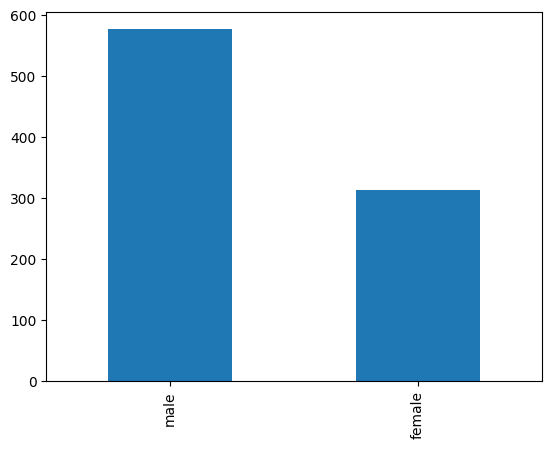

In [17]:
agent.run('Create a bar chart showing the distribution of a specific column.')

In [18]:
agent.run("What data preprocessing steps should I take before modeling?")



> Entering new AgentExecutor chain...
Thought: I should think about what data preprocessing steps are necessary for the dataframe.
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Thought: I should check for missing values.
Actio

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-fcLGoNGfsHO2V5Ot1FT5z2w8 on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-fcLGoNGfsHO2V5Ot1FT5z2w8 on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to a

 I should also check for any outliers.
Action: python_repl_ast
Action Input: df.describe()
Observation:        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-fcLGoNGfsHO2V5Ot1FT5z2w8 on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for text-davinci-003 in organization org-fcLGoNGfsHO2V5Ot1FT5z2w8 on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to a

 I now know the data preprocessing steps I should take.
Final Answer: Before modeling, I should check for missing values and outliers in the dataframe.

> Finished chain.


'Before modeling, I should check for missing values and outliers in the dataframe.'

In [20]:
df.select_dtypes(exclude='object').corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
